## IMPORTING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import gender_guesser.detector as gender

## ALLOWING PANDAS TO DISPLAY ALL THE COLUMNS WHEN A DATAFRAME IS BEEN DISPLAYED

In [2]:
pd.set_option("display.max_columns", None)

## IMPORTING THE DATA

In [3]:
fights = pd.read_csv('data/raw_fights_data.csv', sep = ';')
fighters = pd.read_excel('data/formatted_data/fighters_formatted.xlsx').drop('Unnamed: 0', axis = 1)

## MAPPING THE WINS PER FIGHTER WITH THE FIGHTER NAME COLUMN

In [4]:
wins_per_fighter = fights['Winner'].value_counts().to_dict()
fighters['Wins'] = fighters['fighter_name'].map(wins_per_fighter).fillna(0)

## DEFINING THE WEIGHT CATEGORIES IN RELATION WITH THE WEIGHT OF THE FIGHTER

In [5]:
weight_bins = ['light', 'semilight', 'medium', 'semiheavy', 'heavy']

fighters['Weight Range'] = pd.qcut(fighters['Weight'], 
                                   q = [0, .2, .4, .6, .8, 1], 
                                   labels = weight_bins)

def weight_nan_check(weight, weight_range):

    if pd.isnull(weight):
        return np.NaN
    
    else:
        return weight_range

fighters['Weight Range'] = fighters.apply(lambda row: weight_nan_check(row['Weight'], row['Weight Range']), axis = 1)

## SPLITTING THE FIGHTERS IN DIFFERENT DATAFRAMES DEPENDING ON THE WEIGHT CLASS

In [6]:
light_fighters = fighters[fighters['Weight Range'] == 'light']
semilight_fighters = fighters[fighters['Weight Range'] == 'semilight']
medium_fighters = fighters[fighters['Weight Range'] == 'medium']
semiheavy_fighters = fighters[fighters['Weight Range'] == 'semiheavy']
heavy_fighters = fighters[fighters['Weight Range'] == 'heavy']

## EXTRACTING ONLY THE NUMERICAL DATA FOR ALL THE DATAFRAMES

In [7]:
fighters_numerical = fighters.select_dtypes(include = np.number)
light_fighters_numerical = light_fighters.select_dtypes(include = np.number)
semilight_fighters_numerical = semilight_fighters.select_dtypes(include = np.number)
medium_fighters_numerical = medium_fighters.select_dtypes(include = np.number)
semiheavy_fighters_numerical = semiheavy_fighters.select_dtypes(include = np.number)
heavy_fighters_numerical = heavy_fighters.select_dtypes(include = np.number)

## VISUALIZING THE CORRELATION BETWEEN THE NUMBER OF WINS AND THE CHARACTERISTICS OF ALL THE FIGHTERS

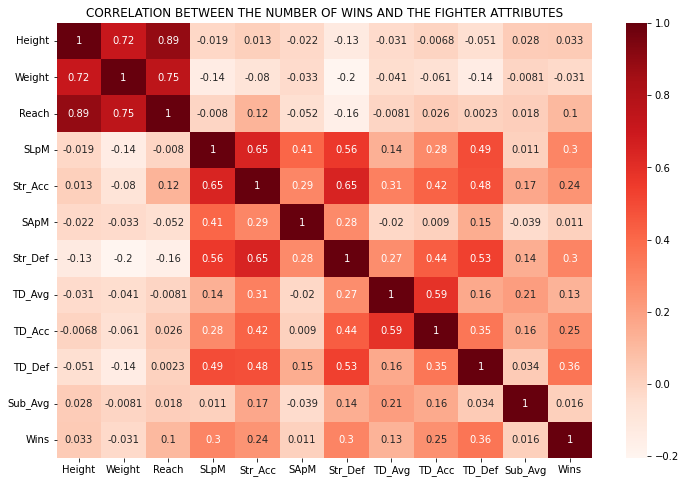

In [8]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(fighters_numerical.corr(), annot = True, cmap = 'Reds')
plt.title('CORRELATION BETWEEN THE NUMBER OF WINS AND THE FIGHTER ATTRIBUTES')
plt.show()

## VISUALIZING THE RELATION BETWEEN THE TAKEDOWN DEFENSE AND THE NUMBER OF WINS

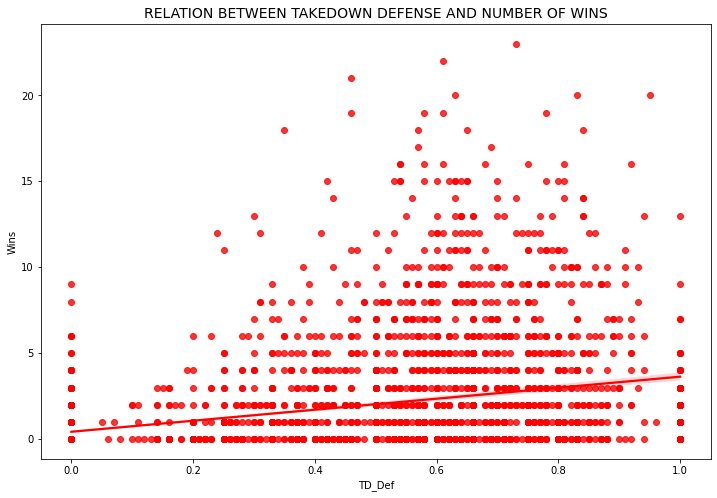

In [9]:
fig = plt.figure(figsize = (12, 8))
sns.regplot(x = 'TD_Def', y = 'Wins', data = fighters_numerical, color = 'red')
plt.title('RELATION BETWEEN TAKEDOWN DEFENSE AND NUMBER OF WINS', fontsize = 14)
plt.show()

## VISUALIZING THE RELATION BETWEEN THE SIGNIFICANT PUNCHES LANDED AND THE NUMBER OF WINS

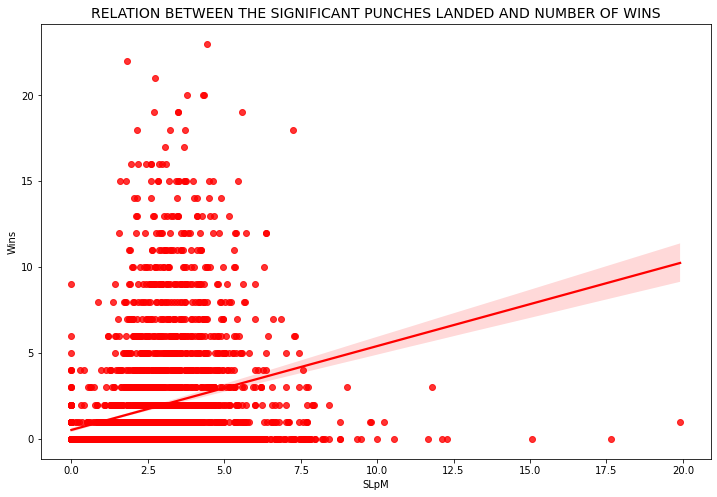

In [10]:
fig = plt.figure(figsize = (12, 8))
sns.regplot(x = 'SLpM', y = 'Wins', data = fighters_numerical, color = 'red')
plt.title('RELATION BETWEEN THE SIGNIFICANT PUNCHES LANDED AND NUMBER OF WINS', fontsize = 14)
plt.show()

## VISUALIZING THE RELATION BETWEEN THE STRIKING DEFENSE AND THE NUMBER OF WINS

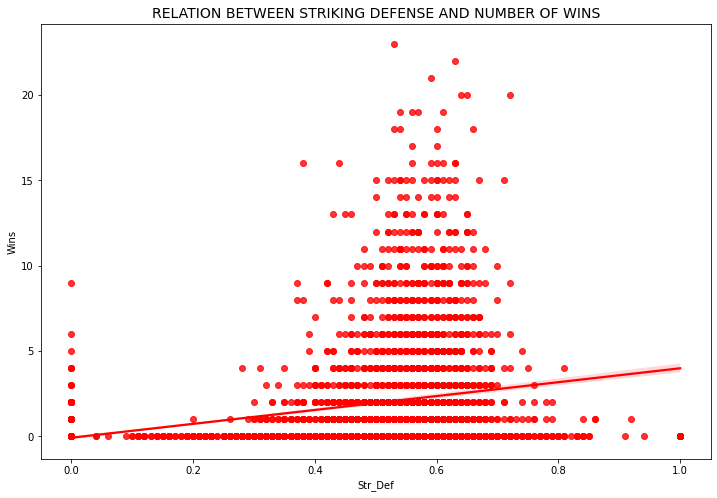

In [11]:
fig = plt.figure(figsize = (12, 8))
sns.regplot(x = 'Str_Def', y = 'Wins', data = fighters_numerical, color = 'red')
plt.title('RELATION BETWEEN STRIKING DEFENSE AND NUMBER OF WINS', fontsize = 14)
plt.show()

## VISUALIZING THE CORRELATION BETWEEN THE NUMBER OF WINS AND THE CHARACTERISTICS OF THE LIGHT FIGHTERS

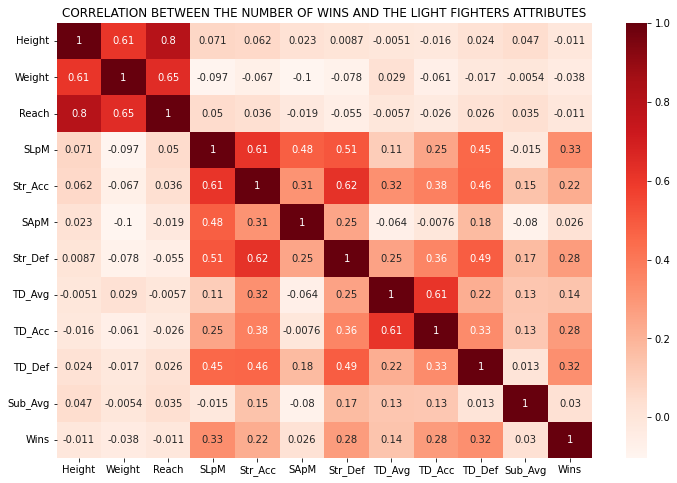

In [12]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(light_fighters_numerical.corr(), annot = True, cmap = 'Reds')
plt.title('CORRELATION BETWEEN THE NUMBER OF WINS AND THE LIGHT FIGHTERS ATTRIBUTES')
plt.show()

## VISUALIZING THE CORRELATION BETWEEN THE NUMBER OF WINS AND THE CHARACTERISTICS OF THE SEMILIGHT FIGHTERS

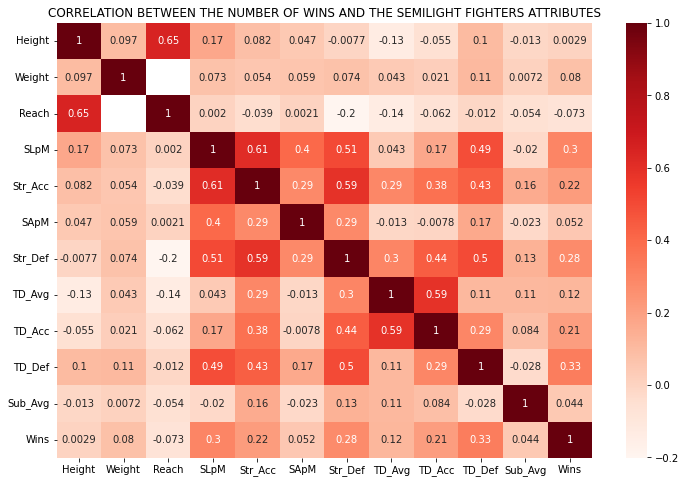

In [13]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(semilight_fighters_numerical.corr(), annot = True, cmap = 'Reds')
plt.title('CORRELATION BETWEEN THE NUMBER OF WINS AND THE SEMILIGHT FIGHTERS ATTRIBUTES')
plt.show()

## VISUALIZING THE CORRELATION BETWEEN THE NUMBER OF WINS AND THE CHARACTERISTICS OF THE MEDIUM FIGHTERS

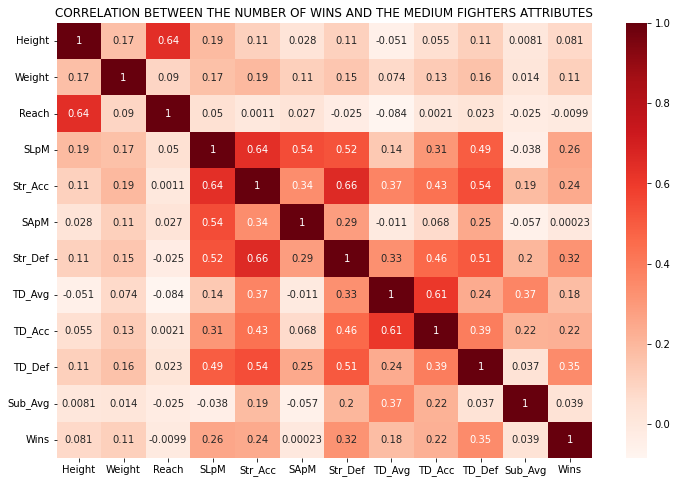

In [14]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(medium_fighters_numerical.corr(), annot = True, cmap = 'Reds')
plt.title('CORRELATION BETWEEN THE NUMBER OF WINS AND THE MEDIUM FIGHTERS ATTRIBUTES')
plt.show()

## VISUALIZING THE CORRELATION BETWEEN THE NUMBER OF WINS AND THE CHARACTERISTICS OF THE SEMIHEAVY FIGHTERS

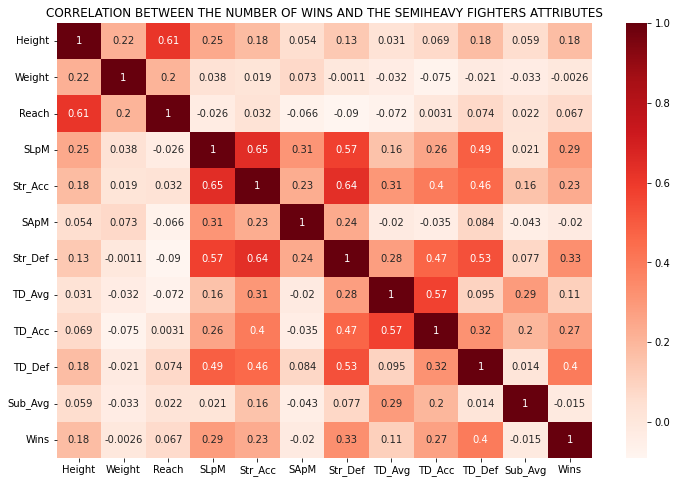

In [15]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(semiheavy_fighters_numerical.corr(), annot = True, cmap = 'Reds')
plt.title('CORRELATION BETWEEN THE NUMBER OF WINS AND THE SEMIHEAVY FIGHTERS ATTRIBUTES')
plt.show()

## VISUALIZING THE CORRELATION BETWEEN THE NUMBER OF WINS AND THE CHARACTERISTICS OF THE HEAVY FIGHTERS

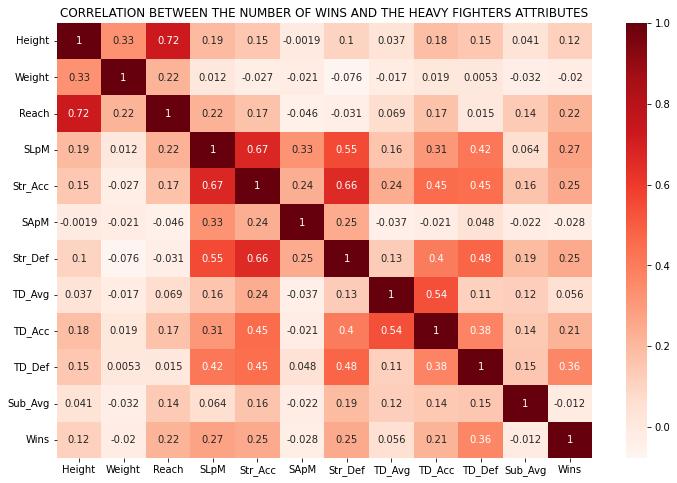

In [16]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(heavy_fighters_numerical.corr(), annot = True, cmap = 'Reds')
plt.title('CORRELATION BETWEEN THE NUMBER OF WINS AND THE HEAVY FIGHTERS ATTRIBUTES')
plt.show()

## VISUALIZING THE RELATION BETWEEN THE REACH AND THE NUMBER OF WINS IN HEAVY FIGHTERS

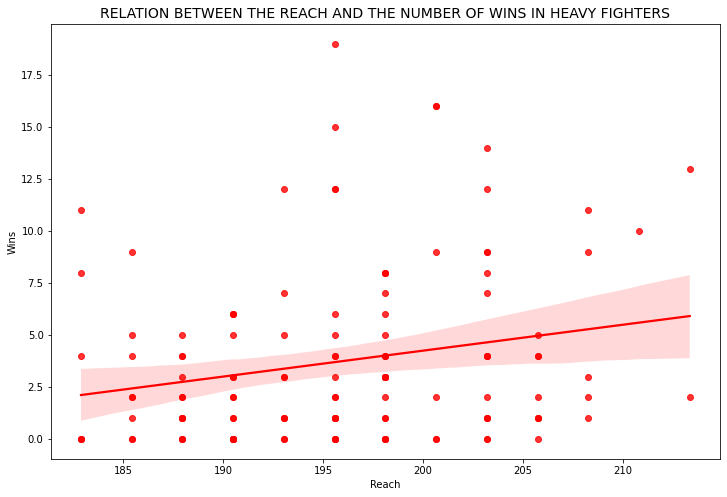

In [17]:
fig = plt.figure(figsize = (12, 8))
sns.regplot(x = 'Reach', y = 'Wins', data = heavy_fighters_numerical, color = 'red')
plt.title('RELATION BETWEEN THE REACH AND THE NUMBER OF WINS IN HEAVY FIGHTERS', fontsize = 14)
plt.show()

## DEFINING THE GENDER OF THE FIGHTERS AND GENERATING TWO DATAFRAMES DEPENDING ON THE GENDER

In [18]:
genders = list()
gender_detector = gender.Detector()

for name in fighters['fighter_name'].values:
    genders.append(gender_detector.get_gender(name.split()[0]))

fighters['Gender'] = genders
fighters['Gender'] = fighters['Gender'].replace({'unknown': 'male',
                                                 'mostly_male': 'male',
                                                 'andy': 'male',
                                                 'mostly_female': 'female'})

male_fighters = fighters[fighters['Gender'] == 'male']
male_fighters_numerical = male_fighters.select_dtypes(include = np.number)

female_fighters = fighters[fighters['Gender'] == 'female']
female_fighters_numerical = female_fighters.select_dtypes(include = np.number)

## VISUALIZING THE CORRELATION BETWEEN THE NUMBER OF WINS AND THE CHARACTERISTICS OF THE MALE FIGHTERS

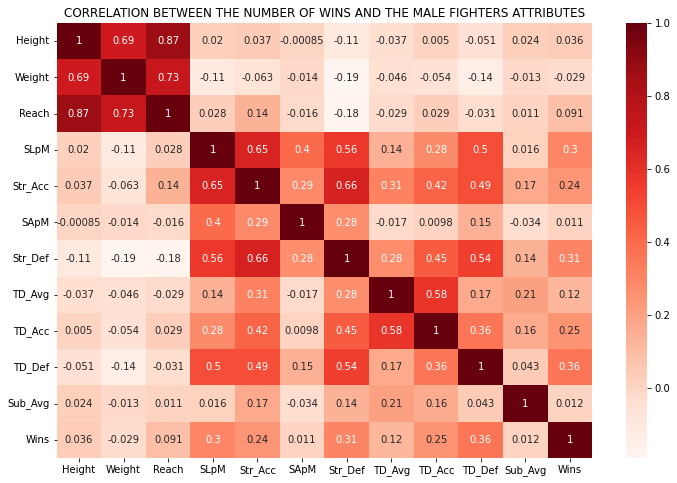

In [19]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(male_fighters_numerical.corr(), annot = True, cmap = 'Reds')
plt.title('CORRELATION BETWEEN THE NUMBER OF WINS AND THE MALE FIGHTERS ATTRIBUTES')
plt.show()

## VISUALIZING THE CORRELATION BETWEEN THE NUMBER OF WINS AND THE CHARACTERISTICS OF THE FEMALE FIGHTERS

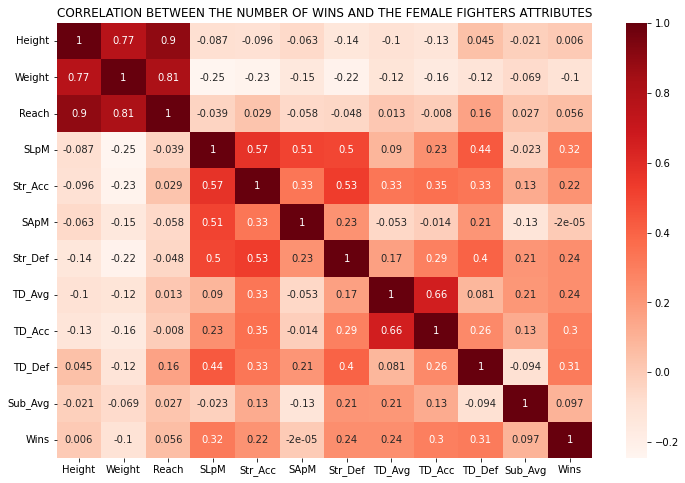

In [20]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(female_fighters_numerical.corr(), annot = True, cmap = 'Reds')
plt.title('CORRELATION BETWEEN THE NUMBER OF WINS AND THE FEMALE FIGHTERS ATTRIBUTES')
plt.show()

## DEFINING DIFFERENT HYPOTHESIS ABOUT THE DATA THAT WE HAVE

In [21]:
from scipy.stats import ttest_ind

fighters = fighters.dropna()

print('\nP-VALUE OF THE DEFINED HYPHOTESIS')
print('---------------------------------\n')

print(f'P-VALUE HEIGHT BS REACH --> {ttest_ind(fighters["Height"], fighters["Reach"])[1]}')
print(f'P-VALUE TD_DEF VS WINS --> {ttest_ind(fighters["TD_Def"], fighters["Wins"])[1]}')


P-VALUE OF THE DEFINED HYPHOTESIS
---------------------------------

P-VALUE HEIGHT BS REACH --> 2.3099580215603848e-38
P-VALUE TD_DEF VS WINS --> 2.4343408875162836e-171


## CONCLUSIONS

1. AT A GENERAL LEVEL WE CAN OBSERVE THAT THE ATTRIBUTES THAT PRESENT A HIGHER CORRELATION WITH THE NUMBER OF VICTORIES AND THAT ARE SHARED BY ALL FIGHTERS ARE: TAKE DOWN DEFFENSE, STRIKING DEFFENSE AND SIGNIFICANT LANDED PUNCHES PER MINUTE. IN GENERAL TERMS, WE CAN CONCLUDE THAT THE DEFENSIVE VARIABLES HAVE A HIGHER CORRELATION WITH THE NUMBER OF VICTORIES.

2. WE BELIEVE THAT THE INFLUENCE OF THESE ATTRIBUTES MAY VARY DEPENDING ON THE WEIGHT OF THE FIGHTERS. THEREFORE, WE WILL GROUP THE FIGHTERS ACCORDING TO THEIR WEIGHT IN THE FOLLOWING CATEGORIES: LIGHT, SEMI-LIGHT, MEDIUM, SEMI-HEAVY AND HEAVY.

- LIGHT: THE REACH VARIABLE IS LESS IMPORTANT THAN IN OTHER CATEGORIES. FOR THE REST OF THE  CATEGORIES THERE ARE NO RELEVANT CHANGES.
- SEMI-LIGHT: VERY SIMILAR TO LIGHT, REACH IS STILL LESS IMPORTANT THAN IN OTHER CATEGORIES.
- MEDIUM: REACH IS STILL NOT VERY RELEVANT BUT WEIGHT IS BECOMING MORE IMPORTANT AS A DETERMINING VARIABLE.
- SEMI-HEAVY: WE OBSERVE THAT HEIGHT IS A DIFFERENTIAL ELEMENT, MEANING THAT GREATER HEIGHT IMPLIES AN ADVANTAGE. WE CAN ALSO SEE THAT TAKE DOWN DEFFENSE REACHES ITS HIGHEST LEVEL OF CORRELATION.
- HEAVY: REACH INCREASES ITS VALUE COMPARED TO OTHER CATEGORIES IN TERMS OF CORRELATION LEVEL. SIMILARLY, HEIGHT MAINTAINS A CORRELATION SIMILAR TO THAT OBSERVED IN THE SEMI-HEAVY CATEGORY.

3. AFTER ANALYZING HOW THE ATTRIBUTES INFLUENCE TO A GREATER EXTENT ACCORDING TO THE WEIGHT CATEGORY, WE DECIDED TO ANALYZE IF THE ATTRIBUTES VARY ACCORDING TO THE GENDER OF THE FIGHTERS. BETWEEN THE WEIGHT AND THE NUMBER OF VICTORIES, WHICH IS NOT EXCESSIVELY SIGNIFICANT. IN ADDITION, THE NUMBER OF SUBMISSIONS ATTEMPTED EVERY 15 MINUTES, SLIGHTLY INCREASES ITS POSITIVE CORRELATION WITH THE NUMBER OF VICTORIES

HYPOTHESIS P-VALUE

- H0 HEIGHT/REACH: THERE IS NO APPRECIABLE RELATIONSHIP BETWEEN THE VARIABLES HEIGHT AND REACH
- H1 HEIGHT/REACH: THERE IS AN APPRECIABLE RELATIONSHIP BETWEEN THE VARIABLES HEIGHT AND REACH
- THE P-VALUE BEING LESS THAN 0.05 ALLOWS US TO REJECT HYPOTHESIS 0.
- H0 TD_DEF/WINS: THERE IS NO APPRECIABLE RELATIONSHIP BETWEEN THE VARIABLES TAKEDOWNS DEFENSE AND WINS.
- H1 TD_DEF/WINS: THERE IS AN APPRECIABLE RELATIONSHIP BETWEEN THE VARIABLES TAKEDOWNS DEFENSE AND WINS.
- THE P-VALUE BEING LESS THAN 0.05 ALLOWS US TO REJECT HYPOTHESIS 0.
